# Mempersiapkan Library dan Data

Mencari tau data apa yang tersedia dan mengumpulkan data yang dibutuhkan terkait pelanggan. 


Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:
- Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
- Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
- Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
- Umur: Umur dari pelanggan dalam format angka
- Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
- Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
- Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.


Masalah ini akan di selesaikan dengan menggunakan bantuan library - library di bawah ini:
- Pandas, digunakan untuk melakukan pemrosesan analisis data
- Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
- Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
- Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
- kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
- Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.


In [4]:
pip install kmodes

In [6]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes
  
import pickle  
from pathlib import Path  


In [7]:
from kmodes.kprototypes import KPrototypes  

# Membaca Data Pelanggan
Langkah pertama adalah mengubah data textfile menjadi pandas dataframe.


In [8]:
# import dataset  
df = pd.read_csv("customer.txt", sep="\t") 
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


# Melihat Informasi dari Data

Melihat informasi dari data yang ada sehingga mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values dan tipe data dengan mudah.


In [9]:
# Menampilkan informasi data  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


# Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data, mengetahui bahwa:
- Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
- Tidak ada nilai null pada data
- Dua kolom memiliki tipe data numeric dan lima data bertipe string


# Melakukan Eksplorasi Data

Selanjutnya melakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Eksplorasi untuk data numerik dan juga data kategorikal.

# Eksplorasi Data Numerik

Melihat distribusi data dari data yang berjenis numerik. 

Disini akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, menyiapkan kolom mana yang merupakan kolom numerik. 

Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

<Figure size 640x480 with 0 Axes>

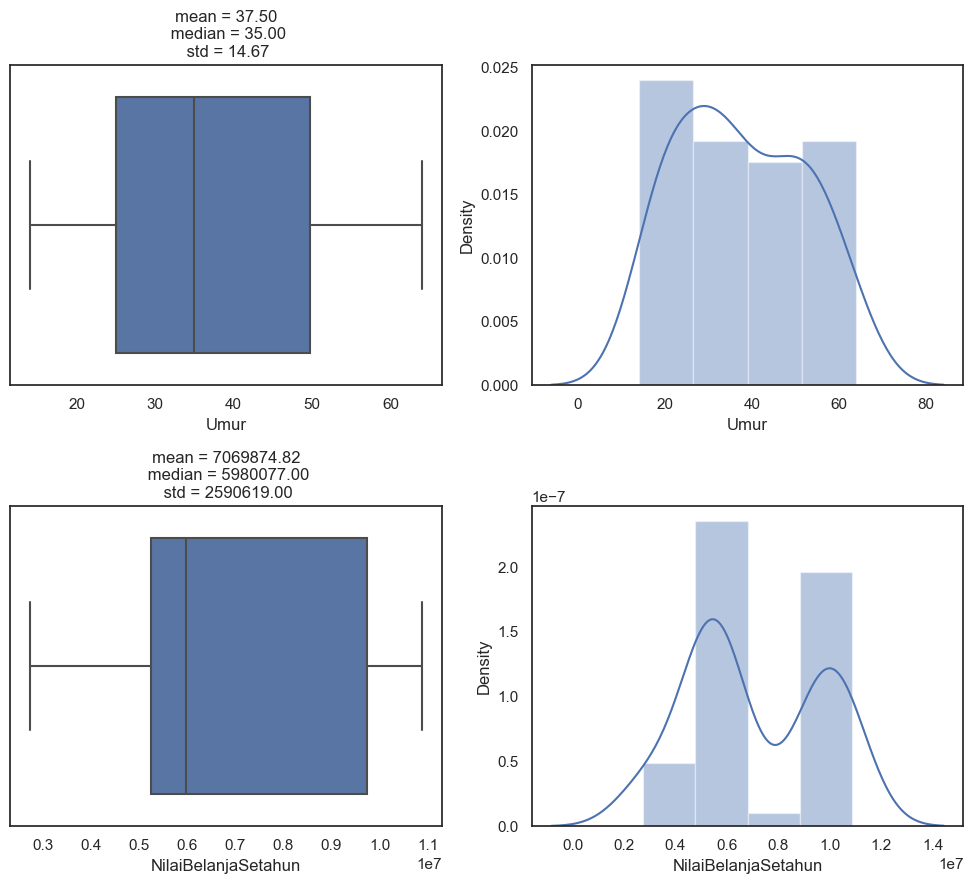

In [10]:
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(df[kol], ax = axs[i][0])
        sns.distplot(df[kol], ax = axs[i][1])   
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik   
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)


# Eksplorasi Data Kategorikal

Selain data numerikal, perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen. Melakukan hal ini dengan menggunakan countplot dari library seaborn.


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

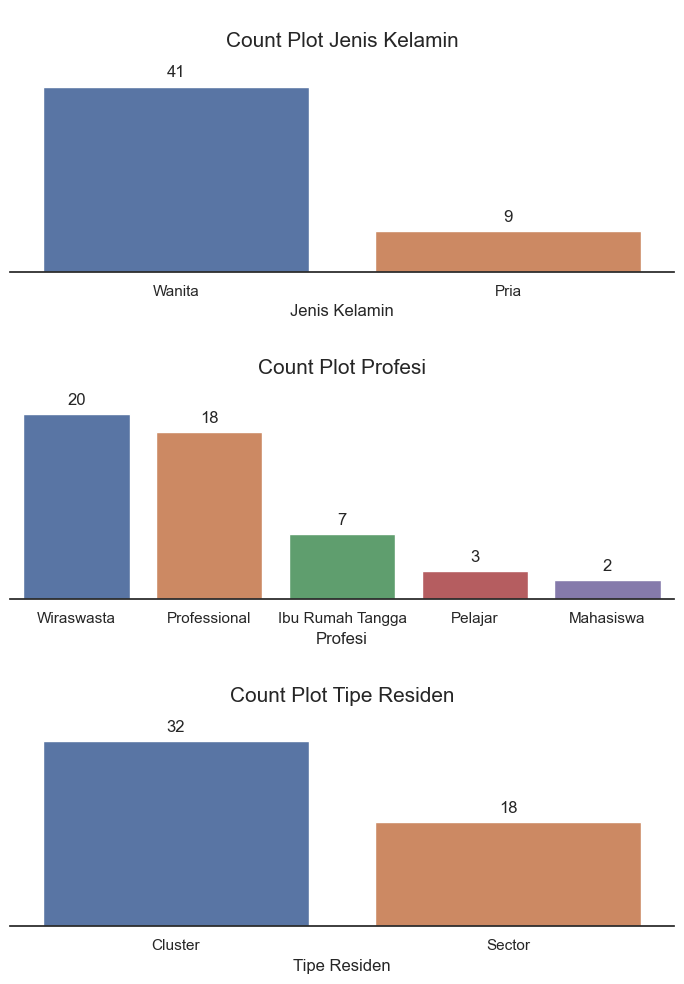

In [11]:
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot  
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')  

    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()


# Kesimpulan
Dari hasil eksplorasi data tersebut mendapatkan informasi:
- Rata-rata dari umur pelanggan adalah 37.5 tahun
- Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
- Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
- Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
- Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor


Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. 

Sedangkan untuk Eksplorasi Data Multivariate, melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.


# Mempersiapkan Data Sebelum Permodelan

Melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes. Salah satu faktor utama dalam algoritma ini adalah perlu menggunakan data yang skala antar variabelnya setara. 

Selain itu juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.

# Standarisasi Kolom Numerik

Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. 

Hal ini dapat dilakukan dengan melakukan standardisasi data. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

langkah:

Melakukan standardisasi kolom-kolom numerik dan menampilkan hasilnya. Selain itu menampilkan deskriptif statistik sebelum dan sesudah standardisasi untuk melihat perbedaannya.


In [13]:
from sklearn.preprocessing import StandardScaler  

# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik ].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


# Konversi Kategorikal Data dengan Label Encoder

Selanjutnya merubah kolom-kolom yang berjenis kategorikal menjadi angka menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan diubah menjadi angka 0 dan teks "Wanita" akan diuubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum digunakan pada algoritma K-Prototype.


In [14]:
from sklearn.preprocessing import LabelEncoder  
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])  
      
# Menampilkan data  
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


# Menggabungkan Data untuk Permodelan

Menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan digunakan untuk permodelan.


In [16]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')  
print (df_model.head())


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# Clustering dan Algoritma K-Prototypes

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.
K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel?

Jawabannya bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa dilakukan dengan menggunakan library k-modes yang didalamnya terdapat modul kprototype.

Untuk menggunakan algoritma kprototype, perlu memasukkan jumlah cluster yang dikehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.
https://github.com/nicodv/kmodes

# Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan.

Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.
 
Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.

Membuat elbow plot dengan jumlah cluster 2 sampai 9 dan tentukan jumlah cluster yang optimal.


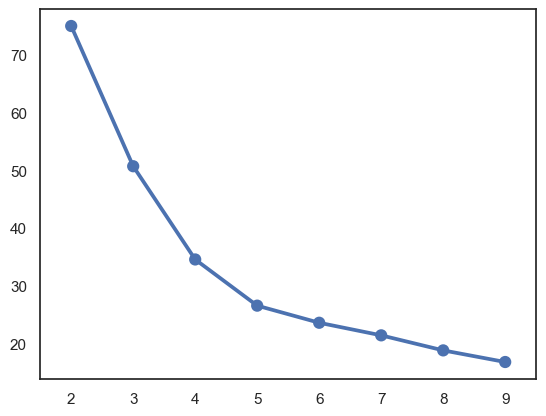

In [17]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()  

# Membuat Model
Selanjutnya melakukan pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

Membuat model Kprototypes dengan nilai k = 5 dan random state = 75. Kemudian simpan hasilnya dalam bentuk pickle.


In [18]:
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))


# Menggunakan Model

Model yang sudah dibuat dapat digunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. Menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di dataset.

Menentukan cluster setiap pelanggan yang ada di dataset menggunakan model kproto yang sudah dibuat sebelumnya. 

Kemudian gabungkan hasil prediksi tersebut dengan data awal (df) sehingga mendapatkan data pelanggan beserta nama cluster-nya.


In [19]:
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters    
print(df_final.head())


segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


# Menampilkan Cluster Tiap Pelanggan
 
Setelah menggabungkan data awal pelanggan dan cluster-nya, perlu menampilkan dan mengobservasi hasilnya untuk membantu memberi nama tiap cluster berdasarkan karakteristiknya.

Menampilkan data pelanggan yang dikelompokkan berdasarkan nomor cluster-nya.


In [20]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range(0, 5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])



Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

# Visualisasi Hasil Clustering - Box Plot

Membuat visualisasi hasil clustering untuk dapat memudahkan melakukan penamaan di tiap-tiap cluster.

Membuat boxlplot untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama cluster-nya. 

- lower fence (Q1 - 1.5*IQR),
- Q1,
- Q2,
- Q3,
- upper fence (Q3 + 1.5*IQR)




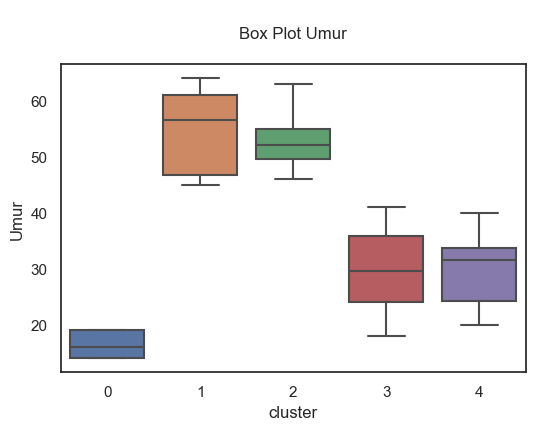

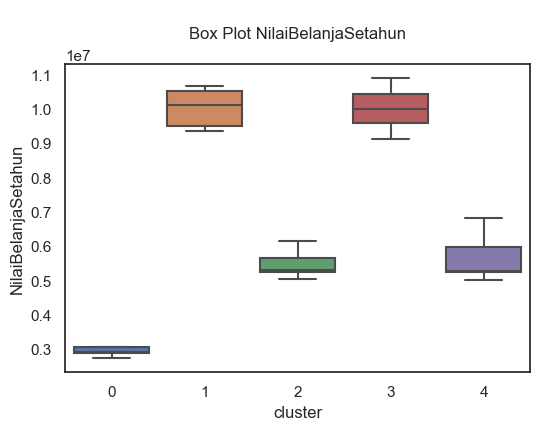

In [21]:
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show()  


# Visualisasi Hasil Clustering - Count Plot

Membuat visualisasi hasil clustering untuk dapat memudahkan penamaan di tiap-tiap cluster.


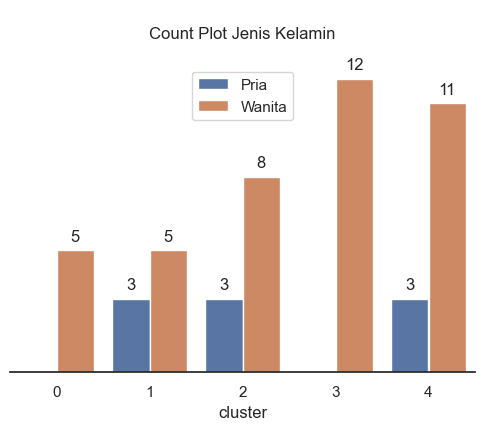

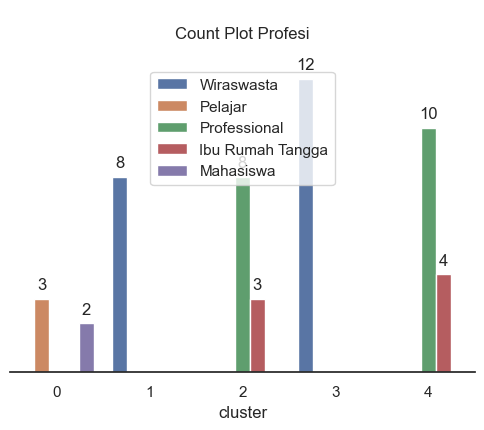

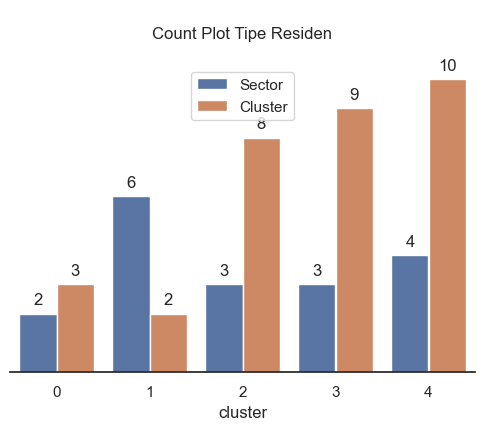

In [23]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  

for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()   


# Menamakan Cluster
Dari hasil observasi yang dilakukan dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:
- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

- Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.

- Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.


In [24]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

# Kesimpulan
Mendapatkan nama yang cocok untuk masing masing cluster, yaitu:

- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
- Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
- Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.


# Pendahuluan

Model yang sudah dibuat harus bisa digunakan sehari-hari untuk memprediksi data baru. Untuk itu mempersiapkan datanya kembali dan kemudian melakukan prediksi dengan parameter dan model yang sudah dibuat.

Penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

Jika dapat mengoperasionalkan model tersebut, maka tim bisnis dapat dengan cepat mengetahui segmen dari pelanggan dan juga bisa mengatur strategi marketing mereka dengan lebih efisien.

# Mempersiapkan Data Baru
Membuat contoh data baru untuk diprediksi dengan model yang sudah dibuat. Hal ini dilakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.


In [25]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)  


  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


# Membuat Fungsi Data Pemrosesan
Selanjutnya perlu membuat fungsi untuk melakukan pemrosesan data berdasarkan parameter yang sama pada saat melakukan permodelan dan kita panggil dengan data baru.

Jadi fungsi ini nantinya akan bisa digunakan untuk:

Melakukan konversi data kategorikal menjadi numerik

Dari proses sebelumnya kita tau representasi tiap kode dan maksudnya yaitu:

Jenis Kelamin
- 0 : Pria
- 1 : Wanita

Profesi

- 0 : Ibu Rumah Tangga
- 1 : Mahasiswa
- 2 : Pelajar
- 3 : Professional
- 4 : Wiraswasta

Tipe Residen

- 1 : Sector
- 0 : Cluster

Selanjutnya harus membuat fungsi untuk merubah data kategorikal menjadi numerik berdasarkan referensi tersebut.

Melakukan standardisasi kolom numerikal.

Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan, yaitu:

Umur
- Rata - rata: 37.5
- Standard Deviasi: 14.7
NilaiBelanjaSetahun
- Rata - rata: 7069874.8
- Standard Deviasi: 2590619.0

Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (Z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

Menggabungkan hasil dua proses sebelumnya menjadi satu dataframe

Selanjutnya perlu menggabungkan kedua perintah tersebut dan menjadi dataframe yang siap untuk dilakukan permodelan.


In [26]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


# Memanggil Model dan Melakukan Prediksi

Setelah memiliki data yang siap digunakan, saatnya memanggil model yang sudah disimpan sebelumnya dan dilanjutkan dengan melakukan prediksi.

Untuk melakukan hal tersebut, kamu perlu membuat prosesnya menjadi dalam satu fungsi yang bernama modelling dengan menggunakan data baru sebagai input-nya.

Membuat fungsi yang bisa digunakan untuk memanggil model dan melakukan prediksi serta menyimpan hasilnya ke dalam satu dataframe. 

In [27]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  


[1]


# Menamakan Segmen
Sama dengan sebelumnya, membuat fungsi untuk melakukan proses ini. Nama cluster  yang sudah didapat di tahap sebelumnya perlu diubah menjadi nama segmen agar lebih mudah diidentifikasi.

Tugas:

Disini harus membuat fungsi yang bernama menamakan_segmen dengan data asli dan clusters sebagai input-nya.


In [28]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters  
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df  
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)  
  
print(new_final_df)  


  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  


# Kesimpulan
Selanjutnya dapat menjadwalkan kode ini. Apakah akan dijalankan secara real-time setiap ada data masuk atau secara batch misal satu hari sekali.

# Penutup
Alur kerja dalam menyelesaikan model clustering:

- Menyiapkan library dan data yang akan digunakan
- Melakukan eksplorasi data numerik dan kategorikal menggunakan boxplot, distplot dan juga countplot
- Melakukan pemrosesan awal data dengan merubah kolom text menjadi numerik dan melakukan standardisasi kolom numerik
- Membuat dan mengoptimalkan model menggunakan algoritma k-prototype
- Menggunakan model untuk memprediksi data-data baru.
